# Kings County Housing Sales Analysis

Student: Bonny Nichol<br>
Self Paced<br>
Scheduled Date: February 28, 2020<br>
Instructor Name: Jeff Herman<br>
Blog Post URL: https://medium.com/@bonnynichol

***
# Objective
The objective of this project is to predict the sales prices of houses in Kings County, WA.<br> 
This project will use the OSEMiN Data Science Method. Obtaining, Scrubbing, Exploring, Modeling, and Interpreting Data. 


## 00 Introduction
Kings County Demographics<br>
Python Libraries Used<br>

## 01 Obtain Data
Importing Data from .CSV file<br>
First Observations of Data


## 02 Data Cleaning
Resolving Missing Values<br>
Making sure data is normally distributed<br>
Removing outliers<br>
Tranforming categorical variables<br>
Log transformations

## 03 Data Exploration
Exploring multicollinearity

## 04 Model Data
Train-Test-Split<br>
Regression<br>
OLS

## 05 Interprete Data
Stepwise Selection<br>
Cross validation<br>
Feature Selection<br>
Evaluating P Values

***
## Introduction

#### Kings County Demographics <br>

Kings County, WA is located in the state of Washington in the northwest corner of the United States of America. The region contains Seattle, the largest city in the state and capital and is also the 12th most populous county in the United States.

#### Python Libraries <br>
Pandas <br>
Seaborn <br>
Numpy <br>
Matplotlib.pyplot<br>
sklearn<br>
statsmodels.api
***

In [1740]:
#data and visualizations
import pandas as pd
import seaborn as sns
import numpy as np

#modeling
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm

#feature selection
from sklearn.feature_selection import RFE

%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 21)
pd.set_option('display.max_rows', 70)

***
## Step One: Obtain Data

The first process of OSEMiN data science method is to bring the data into the Python environment. Typcially, the data can exist in many formats including MySQL, Oracle, MongoDB. The data can come from Website APIs, scraped data from the web or flat text data types like datasets from Kaggle. For this project we are importing a CSV file and using the Pandas library for this conversion into Python.
***

In [1741]:
# load dataset
df = pd.read_csv('kc_house_data.csv')
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,nan,0.00,3,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,3,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,3,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,5,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,3,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
5,7237550310,5/12/2014,1230000.00,4,4.50,5420,101930,1.00,0.00,0.00,3,11,3890,1530.0,2001,0.00,98053,47.66,-122.00,4760,101930
6,1321400060,6/27/2014,257500.00,3,2.25,1715,6819,2.00,0.00,0.00,3,7,1715,?,1995,0.00,98003,47.31,-122.33,2238,6819
7,2008000270,1/15/2015,291850.00,3,1.50,1060,9711,1.00,0.00,nan,3,7,1060,0.0,1963,0.00,98198,47.41,-122.31,1650,9711
8,2414600126,4/15/2015,229500.00,3,1.00,1780,7470,1.00,0.00,0.00,3,7,1050,730.0,1960,0.00,98146,47.51,-122.34,1780,8113
9,3793500160,3/12/2015,323000.00,3,2.50,1890,6560,2.00,0.00,0.00,3,7,1890,0.0,2003,0.00,98038,47.37,-122.03,2390,7570


Let's do a quick check of our data to check for missing values.

In [1742]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


From the above we learned valuable metadata of our dataset like the number of cols and rows, the number of values in each column and the data type of each column.

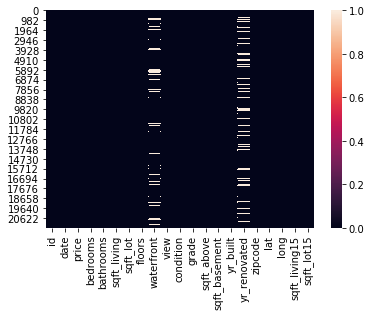

In [1743]:
sns.heatmap(df.isnull())
plt.show()

We can tell from the heatmap and from the full summary of the dataframe, columns 'waterfront', 'yr_renovated' and 'view' are missing data. We will resolve this when we clean the data.

***
## First Observations

This dataset includes 21597 data observations with 21 features described below.
<br>
<br>__id__ id number for the data entry
<br>__date__ date the house was sold
<br>__price__ price of the house
<br>__bedrooms__ number of bedrooms in the house
<br>__bathrooms__ number of bathrooms in the house
<br>__sqft_living__ square footage of the living room
<br>__sqft_lot__ square footage of the lot size
<br>__floors__ number of floors in the house
<br>__waterfront__ if the house is located at the waterfront (1 = yes, 0 = no)
<br>__view__ does the house have a view
<br>__condition__ condition of the house
<br>__grade__ grade level of the house
<br>__sqft_above__ square footage of the house not including the basement
<br>__sqft_basement__ square footage of only the basement
<br>__yr_built__ year the house was built
<br>__yr_renovated__ year the house was renovated
<br>__zipcode__ zipcode where the house is located
<br>__lat__ latitude where the house is located
<br>__long__ longitude where the house is located
<br>__sqft_living15__ square footage of the living area in 2015 (this implies there were renovations)
<br>__sqft_lot15__ square footage of the lot size in 2015


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1cfc142ac8>,
      dtype=object)

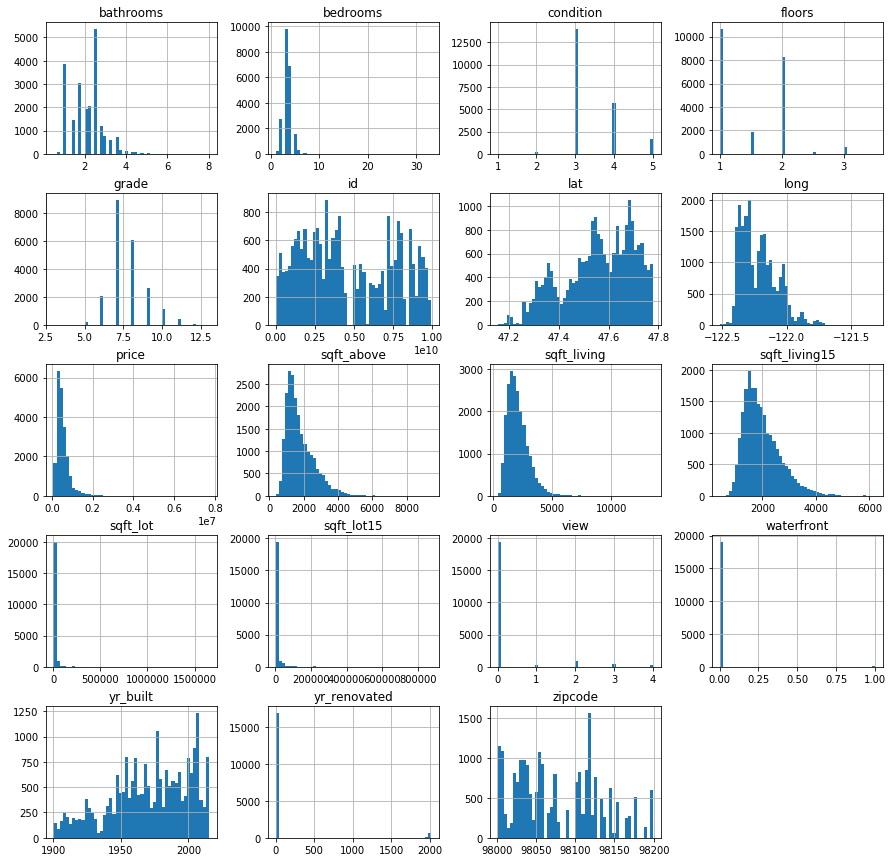

In [1744]:
#Exploring pre-scrubbed data
df.hist(bins = 50, figsize=(15,15), grid = True)

There is not a lot of normal distribution of our data going on here. This will need to be solved before creating our model.

In [1745]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


We can also begin to see some big problems with the data such as the bedrooms feature having a max data entry of 33 bedrooms. Whether an entry like resembles a large mansion or the data is an error, we will need to remove it and other outliers when we clean our data.

In [1746]:
#sorting by id
sortedbyid = df.sort_values('id')
sortedbyid.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,4/22/2015,300000.00,6,3.00,2400,9373,2.00,0.00,0.00,3,7,2400,0.0,1991,0.00,98002,47.33,-122.21,2060,7316
2494,1000102,9/16/2014,280000.00,6,3.00,2400,9373,2.00,nan,0.00,3,7,2400,0.0,1991,0.00,98002,47.33,-122.21,2060,7316
6729,1200019,5/8/2014,647500.00,4,1.75,2060,26036,1.00,nan,0.00,4,8,1160,900.0,1947,0.00,98166,47.44,-122.35,2590,21891
8404,1200021,8/11/2014,400000.00,3,1.00,1460,43000,1.00,0.00,0.00,3,7,1460,0.0,1952,0.00,98166,47.44,-122.35,2250,20023
8800,2800031,4/1/2015,235000.00,3,1.00,1430,7599,1.50,0.00,0.00,4,6,1010,420.0,1930,0.00,98168,47.48,-122.27,1290,10320
3553,3600057,3/19/2015,402500.00,4,2.00,1650,3504,1.00,0.00,0.00,3,7,760,890.0,1951,2013.00,98144,47.58,-122.29,1480,3504
18506,3600072,3/30/2015,680000.00,4,2.75,2220,5310,1.00,nan,0.00,5,7,1170,1050.0,1951,nan,98144,47.58,-122.29,1540,4200
3197,3800008,2/24/2015,178000.00,5,1.50,1990,18200,1.00,nan,0.00,3,7,1990,0.0,1960,nan,98178,47.49,-122.26,1860,8658
21047,5200087,7/9/2014,487000.00,4,2.50,2540,5001,2.00,0.00,0.00,3,9,2540,0.0,2005,0.00,98108,47.54,-122.30,2360,6834
4329,6200017,11/12/2014,281000.00,3,1.00,1340,21336,1.50,0.00,0.00,4,5,1340,0.0,1945,0.00,98032,47.40,-122.27,1340,37703


There are clear duplicates for ID. This is probably because the houses were sold multiple times after renovation. This data might be useful later.

In [1747]:
#First analysis of 'Price' in the dataset
price = df['price']

#minimum price in dataset
minimum_price = np.min(price)

#maximum price in dataset
maximum_price = np.max(price) 

#mean price in dataset
mean_price = round(np.mean(price), 2)

#median price
median_price = np.median(price)

# standard deviation of price rounded to 2 decimal places
std_price = round(np.std(price), 2)

#printing results
print('Stats for Kings County Housing Prices: \n')
print('Minimum price: ' + str(minimum_price) + '\n')
print('Maximum price: ' + str(maximum_price) + '\n')
print('Mean price: ' + str(mean_price) + '\n')
print('Median price: ' + str(median_price) + '\n')
print('Standard Deviation of Prices: ' + str(std_price) + '\n')

Stats for Kings County Housing Prices: 

Minimum price: 78000.0

Maximum price: 7700000.0

Mean price: 540296.57

Median price: 450000.0

Standard Deviation of Prices: 367359.63



***
## Step Two: Data Cleaning

The goal of scrubbing data is to create standardized data formats so that later in the project there will not be any interferences with the model.<br>

We see in our initial observations that we have missing values, non normally distributed data, outliers, and other problems with out data that we must solve now.

1. Replacing missing values with median value
2. Cleaning up data types
3. Perfoming Log transformations and removing outliers to create normal distributions
4. Dropping unnecessary columns 


In [1748]:
#Resolving Missing Values 
#Replacing 'waterfront' and 'yr_renovated' NaN values with median values
#We are replacing with median values because median values are less sensitive than mean values

df['waterfront'].fillna(df['waterfront'].median(), inplace = True)
df['yr_renovated'].fillna(df['yr_renovated'].median(), inplace = True)    

# replacing NaN values in 'View' with 0 and making it an integer
df.loc[df.view.isna(), 'view'] = 0
df.view = df.view.astype('int')

#checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(12), object(2)
memory usage: 3.5+ MB


This is starting to look better but now I want to deal with the object types of 'date' and 'sqft_basement'. First I will change the date into a datetime format.

In [1749]:
# Converting date to datetime
df.date = pd.to_datetime(df.date)

In [1750]:
#Tidying up fields of data
#Replacing '?' in 'sqft_basement' with 0

df.sqft_basement = df.sqft_basement.map(lambda x: '0' if x == '?' else x)
df.sqft_basement = df.sqft_basement.astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(12)
memory usage: 3.5 M

In [1751]:
#checking for extraneous values by reviewing top occuring values in each feature
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620    0.00
1825069031   0.00
2019200220   0.00
7129304540   0.00
1781500435   0.00
Name: id, dtype: float64 


date 
 2014-06-23   0.01
2014-06-25   0.01
2014-06-26   0.01
2014-07-08   0.01
2015-04-27   0.01
Name: date, dtype: float64 


price 
 350000.00   0.01
450000.00   0.01
550000.00   0.01
500000.00   0.01
425000.00   0.01
Name: price, dtype: float64 


bedrooms 
 3   0.45
4   0.32
2   0.13
5   0.07
6   0.01
Name: bedrooms, dtype: float64 


bathrooms 
 2.50   0.25
1.00   0.18
1.75   0.14
2.25   0.09
2.00   0.09
Name: bathrooms, dtype: float64 


sqft_living 
 1300   0.01
1400   0.01
1440   0.01
1660   0.01
1010   0.01
Name: sqft_living, dtype: float64 


sqft_lot 
 5000   0.02
6000   0.01
4000   0.01
7200   0.01
7500   0.01
Name: sqft_lot, dtype: float64 


floors 
 1.00   0.49
2.00   0.38
1.50   0.09
3.00   0.03
2.50   0.01
Name: floors, dtype: float64 


waterfront 
 0.00   0.99
1.00   0.01
Name: waterfront, dtype: float64 


view 
 0   0.90
2   0.04
3   0.02
1   0

In [1752]:
#Dropping Unnecessary Columns
to_drop = ['id', 'date', 'grade', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

df.drop(to_drop, axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,221900.00,3,1.00,1180,5650,1.00,0.00,0,3,1180,0.00,1955,0.00,98178
1,538000.00,3,2.25,2570,7242,2.00,0.00,0,3,2170,400.00,1951,1991.00,98125
2,180000.00,2,1.00,770,10000,1.00,0.00,0,3,770,0.00,1933,0.00,98028
3,604000.00,4,3.00,1960,5000,1.00,0.00,0,5,1050,910.00,1965,0.00,98136
4,510000.00,3,2.00,1680,8080,1.00,0.00,0,3,1680,0.00,1987,0.00,98074


In [ ]:
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_basement']
pd.plotting.scatter_matrix(df[x_cols], figsize=(15,15));

In [ ]:
#Removing Outliers

df = df[df.price < 2000000]

df = df[df.sqft_living < 6000]

df = df[df.sqft_lot < 40000]

df = df[df.bedrooms < 5]

df = df[df.bathrooms < 4]

df = df[df.sqft_above < 5000]

df = df[df.sqft_basement < 1500]

df.hist(bins = 50, figsize=(15,15), grid = True)

In [ ]:
#I will drop the feature 'yr_renovated' because there does not seem to be a lot of data
#I will also drop 'zipcode' because I don't believe it will perform well in a regression model later.
to_drop = ['zipcode', 'yr_renovated']

df.drop(to_drop, axis=1, inplace=True)
df.head(20)

## Step Three: Data Exploration

In [ ]:
#Investigating Multicollinearity with a heatmap
f, ax = plt.subplots(figsize=(12,10))

sns.heatmap(df.corr(), center=0, linewidths=2, cmap="Blues");

As we can see above, the darker color data are more likely to have a correlation. Let's check in numbers how closely relatd these features actually are.

In [ ]:
df.corr()

In [ ]:
#If we use a cutoff of 0.70, we can see a few features that are closely related like 
#'sqft_living' and 'bathrooms' and 'sqft_above' and 'sqft_living'

abs(df.corr()) > 0.70

In [ ]:
#Checking out a potential relationship between basement and price
plt.figure(figsize=(10, 8))
plt.plot(df.groupby('sqft_basement')['price'].mean())
plt.xlabel('Basement')
plt.ylabel('Mean Price ($)')
plt.title('Basement vs Mean Price ($)')

As we might guess, it looks like there is a correlation between having a large basement and a higher value price for a home.

In [ ]:
#Checking out a potential relationship between yr_built and price
plt.figure(figsize=(10, 8))
plt.plot(df.groupby('yr_built')['price'].mean())
plt.xlabel('Year Built')
plt.ylabel('Mean Price ($)')
plt.title('Year Built vs Mean Price ($)')

This is interesting to observe that much older and much newer homes are both valued higher in price than mid-century built homes.

In [ ]:
#Also curious about sqft_lot vs price
plt.figure(figsize=(10, 8))
plt.plot(df.groupby('sqft_lot')['price'].mean())
plt.xlabel('Sq Footage of Lot')
plt.ylabel('Mean Price ($)')
plt.title('Sq Footage of Lot vs Mean Price ($)')

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for xcol, ax in zip(list(df)[0:5], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.8)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for xcol, ax in zip(list(df)[5:9], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.8)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

for xcol, ax in zip(list(df)[9:12], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.8)

We can tell from the distribution of data in more vertical column orientations, that the features 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view' and 'condition' can be treated as categorial variables. (Using bins) In addition to these categories, I would also like to convert basement data to category to see if generally having a basement or not having a basement has an effect on the price of the house.

In [ ]:
#Starting with the 'sqft_basement' feature
#Looking at info for the feature before binning
df.sqft_basement.describe()

In [ ]:
#Creating bins
bins = [ -1 , 1 , df.sqft_basement.max() ]
labels = ['0','1']

df.sqft_basement = pd.cut(df.sqft_basement, bins, labels=labels)
df.sqft_basement = df.sqft_basement.astype('category')
sqft_basement1 = pd.get_dummies(df.sqft_basement, prefix='basement', drop_first=True)

In [ ]:
df.sqft_basement.describe()

In [ ]:
df.sqft_basement.head()

In [ ]:
df = df.join([sqft_basement])
df.drop(['sqft_basement'], axis=1, inplace=True)

In [ ]:
#We will change the other features into categorical data
#We will drop one of the dummies to avoid the Dummy Variable Trap and eliminate multicollinearity

#'bedrooms'
df.bedrooms = df.bedrooms.astype('category')
bedrooms = pd.get_dummies(df.bedrooms, prefix='bed', drop_first=True)

#'bathrooms'
df.bathrooms = df.bathrooms.astype('int').astype('category')
bathrooms = pd.get_dummies(df.bathrooms, prefix='bath', drop_first=True)

#'view'
df.view = df.view.astype('category')
view = pd.get_dummies(df.view, prefix='view', drop_first=True)

#'condition'
df.condition = df.condition.astype('category')
condition = pd.get_dummies(df.condition, prefix='cond', drop_first=True)


df = df.join([waterfront, view, condition, bedrooms, bathrooms])
df.drop(['waterfront','view','condition','bedrooms', 'floors', 'bathrooms'], axis=1, inplace=True)
df.head()

In [ ]:
#log Transformations
#logsqft_living = np.log(df["sqft_living"])
#logsqft_lot = np.log(df["sqft_lot"])


In [ ]:
#Min Max Scaling

#df['price'] = ( price - min(price) ) / ( max(price) - min(price) )
#df['sqft_living'] = ( logsqft_living - min(logsqft_living) ) / ( max(logsqft_living) - min(logsqft_living) )
#df['sqft_lot'] = ( logsqft_lot - min(logsqft_lot) ) / ( max(logsqft_lot) - min(logsqft_lot) )



## Step Four: Model Data

### Train-Test-Split
It is important to create a sample of data from our dataset to test our model with in order to avoid overfitting or underfitting the model. The data will need to be randomly split so the model will not be overfit to a specific segment of data.

In [ ]:
df_old = pd.read_csv('kc_house_data.csv')
df_old.head()

In [ ]:
data_ols = df
data_ols.head(3)

In [ ]:
data_ols = data_ols.drop('water_1.0', axis=1)
data_new = data_ols.copy()

In [ ]:
from statsmodels.formula.api import ols

#ols
outcome = 'price'
predictors = data_ols.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
formula

In [ ]:
model = ols(formula=formula, data=df).fit()
model.summary()

In [ ]:
#Train Test Split
X_1, y_1 = data_new[[x for x in data_new.columns if x != 'price']], data_new[['price']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size = 0.2, random_state=123)

In [ ]:
#Train Test
model_V1 = sm.OLS(np.log(y1_train), sm.add_constant(X1_train)).fit()
model_V1.summary()

The first test of data has a total of 14559 data observations. 

In [ ]:
#Test Set
model_V2 = sm.OLS(np.log(y1_test), sm.add_constant(X1_test)).fit()
model_V2.summary()

In [ ]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [ ]:
result = stepwise_selection(predictors, data_new['price'], verbose=True)
print('resulting features:')
print(result)

In [ ]:
#Cross validation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

In [ ]:
#Feature Selection
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=3)
selector = selector.fit(predictors, data_new['price'])

#Finding out which features were selected
selector.support_ 

In [ ]:
#Shows the ranking of the features. 1 = selected
#'view_3', 'view_2' and 'bed_3' were selected
selector.ranking_

In [ ]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)